<a href="https://colab.research.google.com/github/AhmadDzakiPutraDimas/Prediksi-Covid-19-Lampung-menggunakan-RNN-Recurrent-Neural-Network-/blob/main/Copy_of_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis dan Prediksi Model Kasus COVID-19 di Provinsi Lampung





#### Kelompok 2:
1. Ayu Aprianti 118160004
2. M. Faris Janis 118160012
3. Claudia Dona Silvia 118160030
4. Febri Alfharizi Rosadi 118160056
5. Akhdan Aziz Ghozi 118160061
6. Ahmad Dzaki Putra Dimas 118160092



## Pendahuluan
Covid-19 merupakan virus yang menyerang sistem pernapasan dan bisa menyebabkan gangguan pada sistem pernapasan, pneumonia akut, sampai kematian. Terhitung sampai tanggal 28 Maret 2021 kasus Covid-19 di Lampung mencapai 13.878 kasus (Hendranto.2021). Semakin tingginya data kasus positif Covid-19 di Lampung, maka diperlukan suatu pemodelan untuk mengukur data harian mengenai jumlah orang yang terinfeksi, sembuh, maupun meninggal akibat virus Corona dan dapat merepresentasikan dinamika penderitannya menggunakan model. Untuk merepresentasikan model tersebut, akan digunakan pendekatan dengan teknik Deep Learning menggunakan model Reccurent Neural Network (RNN). 

Data yang digunakan merupakan kasus COVID-19 dari 26 Maret 2020 sampai 28 Maret 2021 di Provinsi Lampung.

In [ ]:
#import modul
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import sklearn
import math
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from IPython.display import display, Image
import gspread
import matplotlib.animation as animation
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
drive_id = '4/1AY0e-g60GY05H64THiSqM5kKZ-GHJS7sayI5qT6TcRe4xz17MCWse8aVogk'
files = drive.CreateFile({'id': drive_id})
 
gc = gspread.authorize(gauth.credentials)
url = 'https://docs.google.com/spreadsheets/d/1vTbWGXSgsWkJ-NAqkplVIGyBint9cHQxkMjFoza4cTQ/edit#gid=590904120'
worksheet = gc.open_by_url(url).sheet1
rows = worksheet.get_all_records()

## Program 

In [ ]:
#Import Data
ss = pd.DataFrame.from_records(rows)
ss

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/26/2020,ID-LA,Lampung,2,0,0,2,3,0,37,-34,Province,,Lampung,Indonesia,Asia,Sumatera,UTC+07:00,,13,2,228,205,2435,34624,9095591,262.7,105.0214,-4.91679,0.22,0.33,0.00,0.00,0.00%,1233.33%,,
1,3/27/2020,ID-LA,Lampung,1,0,0,1,4,0,37,-33,Province,,Lampung,Indonesia,Asia,Sumatera,UTC+07:00,,13,2,228,205,2435,34624,9095591,262.7,105.0214,-4.91679,0.11,0.44,0.00,0.00,0.00%,925.00%,0.5,1
2,3/28/2020,ID-LA,Lampung,0,0,0,0,4,0,37,-33,Province,,Lampung,Indonesia,Asia,Sumatera,UTC+07:00,,13,2,228,205,2435,34624,9095591,262.7,105.0214,-4.91679,0.00,0.44,0.00,0.00,0.00%,925.00%,0,1
3,3/29/2020,ID-LA,Lampung,0,0,0,0,4,0,37,-33,Province,,Lampung,Indonesia,Asia,Sumatera,UTC+07:00,,13,2,228,205,2435,34624,9095591,262.7,105.0214,-4.91679,0.00,0.44,0.00,0.00,0.00%,925.00%,1,1
4,3/30/2020,ID-LA,Lampung,4,1,0,3,8,1,37,-30,Province,,Lampung,Indonesia,Asia,Sumatera,UTC+07:00,,13,2,228,205,2435,34624,9095591,262.7,105.0214,-4.91679,0.44,0.88,0.11,0.11,12.50%,462.50%,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,3/24/2021,ID-LA,Lampung,51,3,34,14,13701,738,12376,587,Province,,Lampung,Indonesia,Asia,Sumatera,UTC+07:00,,13,2,228,205,2435,34624,9095591,262.7,105.0214,-4.91679,5.61,1506.33,0.33,81.14,5.39%,90.33%,1.38,1.5
364,3/25/2021,ID-LA,Lampung,51,1,63,-13,13752,739,12439,574,Province,,Lampung,Indonesia,Asia,Sumatera,UTC+07:00,,13,2,228,205,2435,34624,9095591,262.7,105.0214,-4.91679,5.61,1511.94,0.11,81.25,5.37%,90.45%,1,0.33
365,3/26/2021,ID-LA,Lampung,43,1,53,-11,13795,740,12492,563,Province,,Lampung,Indonesia,Asia,Sumatera,UTC+07:00,,13,2,228,205,2435,34624,9095591,262.7,105.0214,-4.91679,4.73,1516.67,0.11,81.36,5.36%,90.55%,0.84,1
366,3/27/2021,ID-LA,Lampung,48,4,51,-7,13843,744,12543,556,Province,,Lampung,Indonesia,Asia,Sumatera,UTC+07:00,,13,2,228,205,2435,34624,9095591,262.7,105.0214,-4.91679,5.28,1521.95,0.44,81.80,5.37%,90.61%,1.12,4


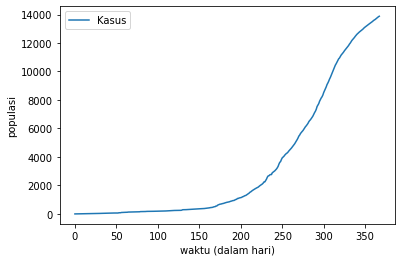

In [ ]:

dk=ss.loc[:,'Total Cases']
dataset = dk.values
TotKasus = dataset.astype('float32')
TotKasus = np.array(TotKasus.reshape(-1,1))
 
plt.plot(TotKasus, label='Kasus') 
plt.xlabel('waktu (dalam hari)')
plt.ylabel('populasi')
plt.legend()
plt.show()

In [ ]:
#Training
def hoho (rand,lookback): 
  x, y = matriks(rand, look_back) 
  x = np.reshape(x, (x.shape[0], 1, x.shape[1])) 
  xTrain , yTrain,xTest,yTest= x[0:300,:],y[0:300,:], x[300:,:],y[300:,:]
 
  return xTrain, yTrain ,xTest, yTest

def scale_invers (kasus,model):
  scaler =MinMaxScaler(feature_range=(0,1))
  rand=scaler.fit_transform(kasus)
  r = scaler.inverse_transform(model)
  return rand,r
 
def matriks(data_arr, look_back):
  X, Y =[], []
  for i in range(len(data_arr)-look_back):
    d=i+look_back  
    X.append(data_arr[i:d])
    Y.append(data_arr[d])
 
  X = np.array(X)
  Y = np.array(Y)
  
  return X, Y
 
def model_loss(history,case):
    
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.title('model loss'+ str(case))
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.show();

In [ ]:
  look_back =15 

  model=tf.keras.Sequential()
  model.add(tf.keras.layers.SimpleRNN(units=50, input_dim=look_back, activation='tanh')) #Hiden layer 1
  model.add(tf.keras.layers.Dense(20, activation='relu')) #Hidden layer 2
  model.add(tf.keras.layers.Dense(20, activation='relu'))
  model.add(tf.keras.layers.Dense(1)) #output
  model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
  

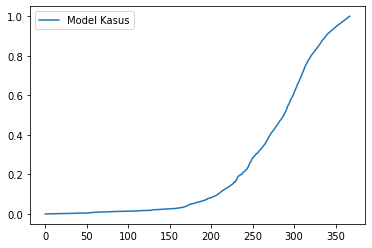

In [ ]:
randKasus,rKasus=scale_invers(TotKasus,TotKasus)
plt.plot(randKasus, label='Model Kasus')
plt.legend()
plt.show()

In [ ]:
xTrain, yTrain ,xTest, yTest = hoho(randKasus,look_back)


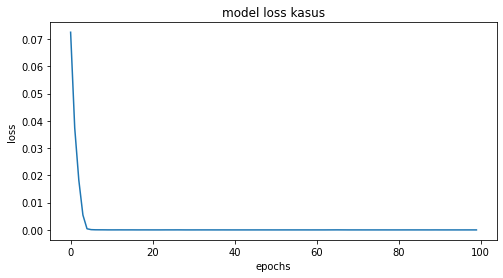

In [ ]:
#Loss model sebelum Tuning
history1 = model.fit(xTrain, yTrain, epochs=100,verbose=0)
model_loss(history1,' kasus')


## Tuning Parameter

In [ ]:
t = np.arange(len(randKasus))
dk=ss.loc[:,'Total Cases']
dk=dk.values
dk = dk.reshape(-1,1)


In [ ]:
mmscaler = MinMaxScaler(feature_range=(0, 1))
last_sms_scaled = mmscaler.fit_transform(dk[-15:])

X_test = []
X_test.append(last_sms_scaled)

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[0],15))

pred_smp = model.predict(X_test)
pred_smp_unscaled = mmscaler.inverse_transform(pred_smp)

smp_today = round(dk.ravel()[367], 0)
predicted_smp = round(pred_smp_unscaled.ravel()[0], 0)

print(f'Jumlah Kasus Aktif Terbaru :{smp_today}')
print(f'Prediksi Jumlah Kasus Aktif Satu hari ke Depan : {predicted_smp}')


Jumlah Kasus Aktif Terbaru :13878
Prediksi Jumlah Kasus Aktif Satu hari ke Depan : 13642.0


In [ ]:
trainPredictKasus = model.predict(xTrain)
testPredictKasus = model.predict(xTest)

In [ ]:
trainScore = np.sqrt(np.mean(yTrain[:,0] - trainPredictKasus[:,0])**2)
print('Train Score Kasus: %.7f RMSE'%(trainScore))
testScore = np.sqrt(np.mean(yTest[:,0] - testPredictKasus[:,0])**2)
print('Test Score Kasus: %.7f RMSE'%(testScore))

Train Score Kasus: 0.0004926 RMSE
Test Score Kasus: 0.0002871 RMSE


In [ ]:
akurasi_train = (1-trainScore)*100
akurasi_test = (1-testScore)*100
print('Accuracy Train Score Kasus: %.7f'%(akurasi_train)+'%')
print('Accuracy Test Score Kasus: %.7f'%(akurasi_test)+'%')

Accuracy Train Score Kasus: 99.9507401%
Accuracy Test Score Kasus: 99.9712883%


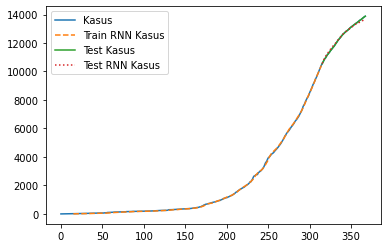

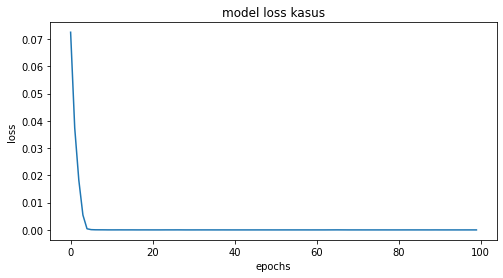

In [ ]:
#Tuning Parameter Kasus


rand, trainPredictKasus = scale_invers(TotKasus,trainPredictKasus)
rand, yTrain = scale_invers(TotKasus,yTrain)
rand, testPredictKasus =scale_invers(TotKasus,testPredictKasus)
rand, yTest = scale_invers(TotKasus,yTest)
 
rr, rrr =scale_invers(TotKasus,randKasus)
plt.plot(rrr, label='Kasus')
plt.plot(t[look_back:300+look_back],trainPredictKasus,'--',label='Train RNN Kasus')
plt.plot(t[300+look_back:],yTest,label='Test Kasus') 
plt.plot(t[300+look_back:], testPredictKasus,':',label='Test RNN Kasus')


plt.legend(loc='upper left')
plt.show()
model_loss(history1,' kasus')

## Evaluasi Model

In [ ]:
testPredictKasus

array([[14034.335]], dtype=float32)

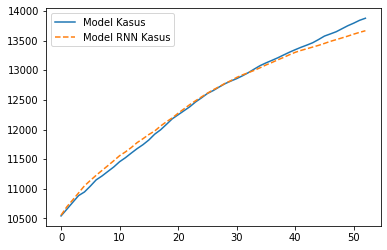

In [ ]:
#Perbandingan Model Prediksi dengan Model Data (dari data 301-367)
plt.plot(yTest, label='Model Kasus')
plt.plot(testPredictKasus, '--', label='Model RNN Kasus')
plt.legend(loc='upper left')
plt.show()
 


In [ ]:
trainScore = np.sqrt(np.mean(yTrain[:,0] - trainPredictKasus[:,0])**2)
print('Train Score Kasus: %.2f RMSE'%(trainScore))
testScore = np.sqrt(np.mean(yTest[:,0] - testPredictKasus[:,0])**2)
print('Test Score Kasus: %.2f RMSE'%(testScore))
 


Train Score Kasus: 6.83 RMSE
Test Score Kasus: 3.98 RMSE


keras.callbacks.History

139722449900496